In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
df = pd.read_csv("spotify.csv")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1282230 entries, 0 to 1282229
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   name              1282223 non-null  object 
 1   daily_rank        1282230 non-null  int64  
 2   daily_movement    1282230 non-null  int64  
 3   weekly_movement   1282230 non-null  int64  
 4   country           1264729 non-null  object 
 5   snapshot_date     1282230 non-null  object 
 6   popularity        1282230 non-null  int64  
 7   is_explicit       1282230 non-null  bool   
 8   duration_ms       1282230 non-null  int64  
 9   danceability      1282230 non-null  float64
 10  energy            1282230 non-null  float64
 11  key               1282230 non-null  int64  
 12  loudness          1282230 non-null  float64
 13  mode              1282230 non-null  int64  
 14  speechiness       1282230 non-null  float64
 15  acousticness      1282230 non-null  float64
 16  

In [35]:
df.head()

,name,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,duration_ms,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,continent,key_sin,key_cos
0,Die With A Smile,1,0,3,NaN,2024-12-31,99,False,251667,0.521,...,0.0304,0.30800,0.0000,0.122,0.535,157.969,3,Unknown,1.224647e-16,-1.000000
1,APT.,2,0,4,NaN,2024-12-31,87,False,169917,0.777,...,0.2600,0.02830,0.0000,0.355,0.939,149.027,4,Unknown,0.000000e+00,1.000000
2,That’s So True,3,0,8,NaN,2024-12-31,95,True,166300,0.554,...,0.0368,0.21400,0.0000,0.159,0.372,108.548,4,Unknown,5.000000e-01,0.866025
3,BIRDS OF A FEATHER,4,0,8,NaN,2024-12-31,97,False,210373,0.747,...,0.0358,0.20000,0.0608,0.117,0.438,104.978,4,Unknown,8.660254e-01,0.500000
4,Who,5,0,13,NaN,2024-12-31,91,False,170887,0.660,...,0.0320,0.00289,0.0000,0.193,0.838,116.034,4,Unknown,0.000000e+00,1.000000


In [36]:
df = df.dropna()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1264722 entries, 50 to 1282229
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   name              1264722 non-null  object 
 1   daily_rank        1264722 non-null  int64  
 2   daily_movement    1264722 non-null  int64  
 3   weekly_movement   1264722 non-null  int64  
 4   country           1264722 non-null  object 
 5   snapshot_date     1264722 non-null  object 
 6   popularity        1264722 non-null  int64  
 7   is_explicit       1264722 non-null  bool   
 8   duration_ms       1264722 non-null  int64  
 9   danceability      1264722 non-null  float64
 10  energy            1264722 non-null  float64
 11  key               1264722 non-null  int64  
 12  loudness          1264722 non-null  float64
 13  mode              1264722 non-null  int64  
 14  speechiness       1264722 non-null  float64
 15  acousticness      1264722 non-null  float64
 16  inst

In [49]:
# 관심 국가 필터링
target_countries = ['GB', 'US', 'JP', 'DE', 'CN']
df_selected = df[df['country'].isin(target_countries)]

# feature와 target 정의
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms', 'is_explicit', 
    'key_sin', 'key_cos', 'mode'
]

X = df_selected[features]
y = df_selected['country']  # target = country

# 학습용/검증용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 )

# -----------------------------
# 의사결정나무 분류
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# -----------------------------
# 6️⃣ 랜덤포레스트 분류
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


=== Decision Tree ===
Accuracy: 0.7429024355094394
              precision    recall  f1-score   support

          DE       0.76      0.77      0.77      3483
          GB       0.57      0.59      0.58      3331
          JP       0.99      0.99      0.99      3500
          US       0.65      0.61      0.63      3564

    accuracy                           0.74     13878
   macro avg       0.74      0.74      0.74     13878
weighted avg       0.74      0.74      0.74     13878

Confusion Matrix:
 [[2689  482    3  309]
 [ 462 1979   10  880]
 [  16    9 3474    1]
 [ 357 1003   36 2168]]

=== Random Forest ===
Accuracy: 0.7450641302781381
              precision    recall  f1-score   support

          DE       0.78      0.76      0.77      3483
          GB       0.58      0.58      0.58      3331
          JP       0.98      1.00      0.99      3500
          US       0.63      0.64      0.63      3564

    accuracy                           0.75     13878
   macro avg       0.74 


🎵 학습용 데이터 수: 55,841개
🎵 테스트용 데이터 수: 13,548개

=== Train 데이터 기준 국가별 곡 수 ===
  country  count
0      US  14899
3      GB  14369
2      DE  13658
1      JP  12915

=== Decision Tree ===
Accuracy: 0.3638175376439327
              precision    recall  f1-score   support

          DE       0.36      0.41      0.38      3906
          GB       0.25      0.25      0.25      2343
          JP       0.73      0.31      0.43      4787
          US       0.27      0.50      0.35      2512

    accuracy                           0.36     13548
   macro avg       0.40      0.37      0.35     13548
weighted avg       0.45      0.36      0.37     13548

Confusion Matrix:
 [[1592  597  347 1370]
 [ 714  594  149  886]
 [1322  764 1477 1224]
 [ 759  423   64 1266]]

=== Random Forest ===
Accuracy: 0.5174933569530558
              precision    recall  f1-score   support

          DE       0.48      0.89      0.63      3906
          GB       0.24      0.13      0.17      2343
          JP       0.86    

C:\Users\pc\AppData\Local\Temp\ipykernel_27784\2211322503.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


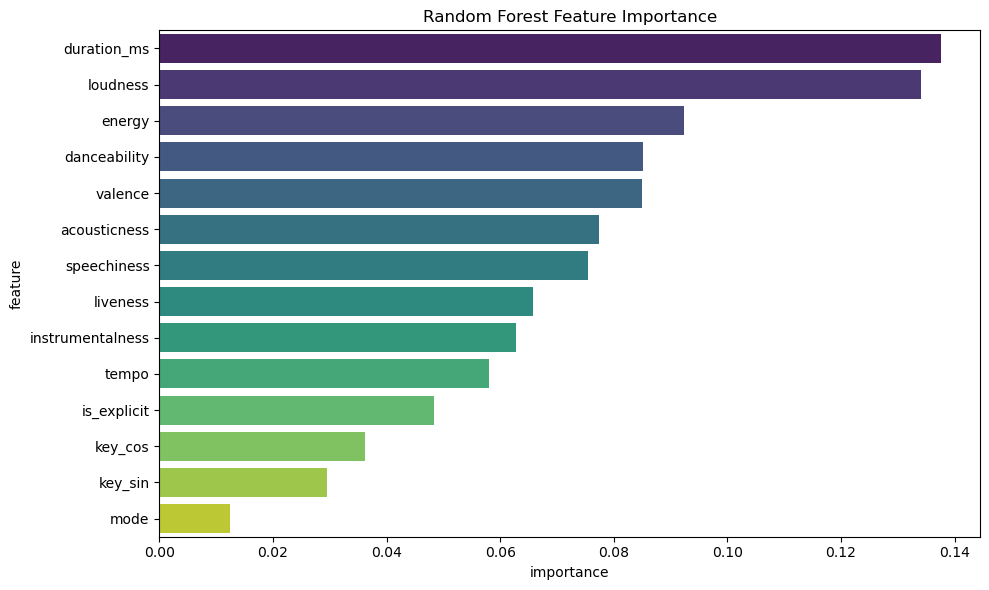

In [67]:
# 1️⃣ 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---------------------------------------------------------
# 2️⃣ 관심 국가 필터링
# ---------------------------------------------------------
target_countries = ['GB', 'US', 'JP', 'DE', 'CN']
df_selected = df[df['country'].isin(target_countries)].copy()

# ---------------------------------------------------------
# 3️⃣ 등장일수 기반 sample_weight 계산 (곡 단위)
# ---------------------------------------------------------
chart_days = df_selected.groupby(['name','country']).size().reset_index(name='chart_days')
df_selected = df_selected.merge(chart_days, on=['name','country'], how='left')

# log1p + 평균 정규화
df_selected['weight'] = np.log1p(df_selected['chart_days'])
df_selected['weight'] /= df_selected['weight'].mean()

# index reset → mask 적용 문제 방지
df_selected = df_selected.reset_index(drop=True)

# ---------------------------------------------------------
# 4️⃣ Feature / Target / Weight 설정
# ---------------------------------------------------------
features = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'duration_ms', 'is_explicit',
    'key_sin', 'key_cos', 'mode'
]

X = df_selected[features]
y = df_selected['country']
w = df_selected['weight']

# ---------------------------------------------------------
# 5️⃣ 스케일링
# ---------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------------------
# 6️⃣ 곡 단위 Train/Test 분리
# ---------------------------------------------------------
unique_tracks = df_selected['name'].unique()
train_tracks, test_tracks = train_test_split(unique_tracks, test_size=0.2, random_state=42)

# boolean mask (numpy array)
train_mask = df_selected['name'].isin(train_tracks).to_numpy()
test_mask  = df_selected['name'].isin(test_tracks).to_numpy()

X_train = X_scaled[train_mask]
X_test  = X_scaled[test_mask]

y_train = y[train_mask].to_numpy()
y_test  = y[test_mask].to_numpy()

w_train = w[train_mask].to_numpy()
w_test  = w[test_mask].to_numpy()

print(f"\n🎵 학습용 데이터 수: {len(X_train):,}개")
print(f"🎵 테스트용 데이터 수: {len(X_test):,}개")

# ---------------------------------------------------------
# 7️⃣ Train 데이터 기준 국가별 곡 수 확인
# ---------------------------------------------------------
train_country_counts = pd.DataFrame({'country': y[train_mask].unique()})
train_country_counts['count'] = [np.sum(y_train == c) for c in y[train_mask].unique()]
print("\n=== Train 데이터 기준 국가별 곡 수 ===")
print(train_country_counts.sort_values(by='count', ascending=False))

# ---------------------------------------------------------
# 8️⃣ Decision Tree 학습 및 평가
# ---------------------------------------------------------
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train, sample_weight=w_train)
y_pred_dt = dt_model.predict(X_test)

print("\n=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

# ---------------------------------------------------------
# 9️⃣ Random Forest 학습 및 평가
# ---------------------------------------------------------
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train, sample_weight=w_train)
y_pred_rf = rf_model.predict(X_test)

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# ---------------------------------------------------------
# 🔟 Feature Importance 시각화 (RandomForest 기준)
# ---------------------------------------------------------
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': features, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()
